In [7]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [8]:
# Read in data
link ='https://raw.githubusercontent.com/vinthegreat84/ML-Lab/main/data/drilling.csv'
data = pd.read_csv(link)
data.head()


,Depth_(m),Bit Size_(inch),Bit_Type,Weight_on_Bit,Bit_Rotation_(RPM),Mud_Weight(pcf),Flow_Rate(gpm),Pump_Pressure_(psia),Rate_of_Penetration_ROP_(M/H)
0,18.0,26.0,1,3.5,35.0,65.0,100,0,0.20
1,20.0,26.0,1,3.5,35.0,65.0,100,200,2.50
2,1093.0,17.5,3,0.0,0.0,76.0,0,0,1.63
3,1163.0,17.5,1,0.0,0.0,80.0,0,0,1.77
4,3083.0,8.5,3,0.0,0.0,80.0,0,0,1.17


In [9]:
# summary Statistics
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Depth_(m),20.0,2558.9125,1118.441794,18.00,2569.4500,2848.500,3341.250,3696.00
Bit Size_(inch),20.0,12.4130,5.581937,6.13,8.5000,12.250,12.250,26.00
Bit_Type,20.0,2.4000,0.753937,1.00,2.0000,3.000,3.000,3.00
Weight_on_Bit,20.0,10.4750,11.638723,0.00,0.0000,7.500,18.125,30.00
Bit_Rotation_(RPM),20.0,15.1250,17.177000,0.00,0.0000,0.000,32.500,35.00
Mud_Weight(pcf),20.0,82.5000,11.037019,62.00,79.0000,87.000,89.000,101.50
Flow_Rate(gpm),20.0,297.7500,233.646579,0.00,75.0000,385.000,550.000,670.00
Pump_Pressure_(psia),20.0,1516.5000,1153.905382,0.00,0.0000,2070.000,2402.500,2650.00
Rate_of_Penetration_ROP_(M/H),20.0,1.3370,1.503901,0.17,0.2175,1.295,1.545,7.02


In [10]:
# Split data into features and target
X = data.drop(columns=["Rate_of_Penetration_ROP_(M/H)"])
y = data["Rate_of_Penetration_ROP_(M/H)"]

In [11]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

In [15]:
# Create a linear regression model
reg = LinearRegression()
# Fit the model to the training data
reg.fit(X_train, y_train)

LinearRegression()

In [16]:
# Make predictions on the test data
y_pred = reg.predict(X_test)


In [17]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


In [18]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error: ", rmse)
print("R-squared value: ", r2)

Mean Absolute Error: 2.3730804362613176
Mean Squared Error: 12.118254854947612
Root Mean Squared Error:  3.481128388173526
R-squared value:  -17.09184179294415


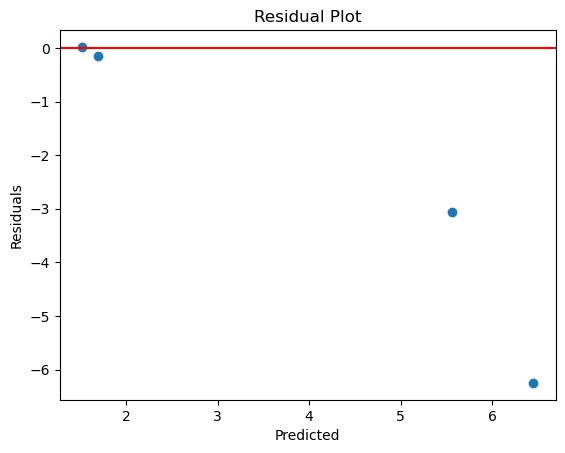

In [19]:
# Plot the residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.axhline(y=0, color='red')
plt.title("Residual Plot")
plt.show()

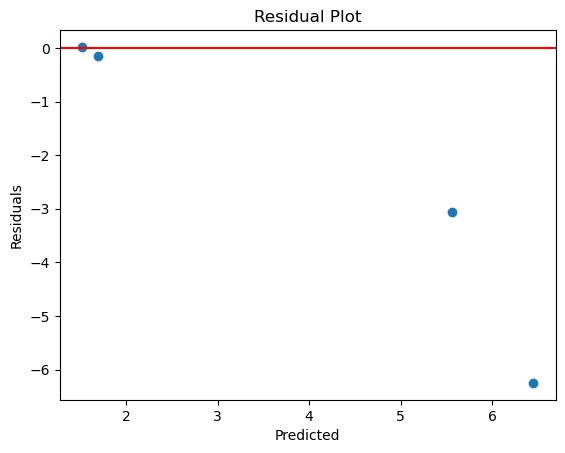

In [20]:
# Plot the residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.axhline(y=0, color='red')
plt.title("Residual Plot")
plt.show()

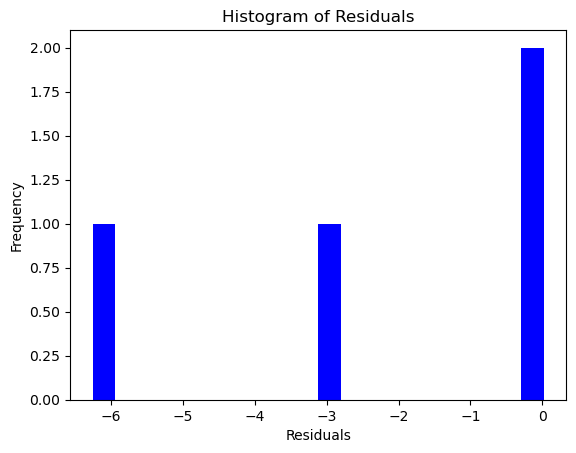

In [21]:
# Model evaluation graphical display by plotting histograms of residuals
plt.hist(residuals, bins=20, color='blue')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()